<a href="https://colab.research.google.com/github/Srinidi-V/Machine-Learning-algorithms/blob/main/Matrix_based_solution_and_error_measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/My Drive/SEM 6/ML Lab/Dataset_2_ml_lab.csv")
columns = list(data.columns)
columns

# Mounted google drive

['high_GPA', 'math_SAT', 'verb_SAT', 'comp_GPA', 'univ_GPA']

In [ ]:
data

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47
...,...,...,...,...,...
100,3.76,605,590,3.74,3.64
101,3.49,692,683,3.27,3.42
102,3.07,680,692,3.19,3.25
103,2.19,617,503,2.98,2.76


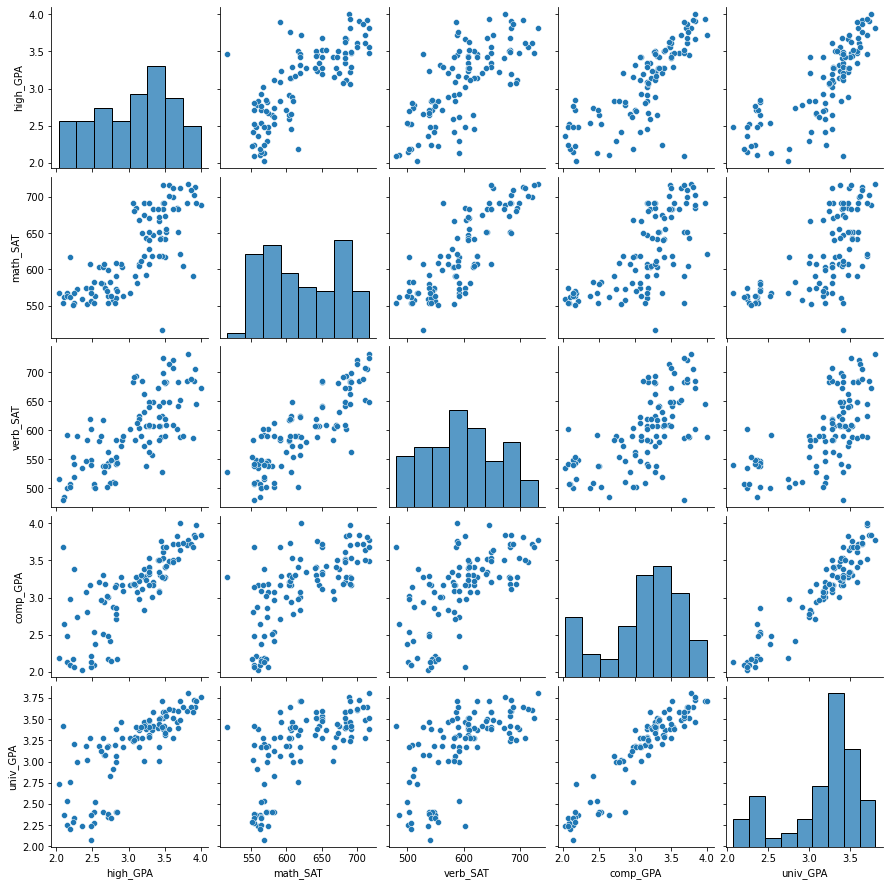

In [ ]:
import seaborn as sns

ax = sns.pairplot(data)

# **Functions to be used**

**Total Sum of Squares**

In [ ]:
def SST(y1,y2):   # y1 - y_target    y2 - mean
  temp = 0
  for i in range(len(y1)):
    x = y1[i] - y2
    x = x**2
    temp += x
  return temp

**Sum of Squared Errors**

In [ ]:
def SSE(y1,y2):   # y1 - y_target   y2 - y_predicted
  temp = 0
  for i in range(len(y1)):
    x = y1[i] - y2[i]
    x = x**2
    temp += x
  return temp

**Regression Sum of Squares**

In [ ]:
def SSR(y1,y2,mean):
  temp = SST(y1,mean) - SSE(y1,y2)
  return temp

**Mean Squared Error**

In [ ]:
def MSE(y1,y2):   # y1 - y_target   y2 - y_predicted
  temp = 0
  for i in range(len(y1)):
    x = y1[i] - y2[i]
    x = x**2
    temp += x
  temp = temp / len(y1)
  return temp

**Root Mean Squared Error**

In [ ]:
def RMSE(y1,y2):
  temp = MSE(y1,y2)
  temp = temp**0.5
  return temp

**R2 or coefficient of determination**

In [ ]:
def R2(y1,y2,mean):
  temp = SSR(y1,y2,mean) / SST(y1,mean)
  return temp

**Linear model with specified parameters**

In [ ]:
def lin_model(w1,w0,x):
  return (w1*x + w0)

## **NOTE** : For finding the parameters w0 and w1, **matrix based solution method** has been employed

# **MODEL - 1 (high_GPA)**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['high_GPA'], data['univ_GPA'], test_size=0.3, random_state = 42)

In [ ]:
x_train

103    2.19
78     3.11
28     3.34
79     3.28
5      2.10
       ... 
71     3.61
14     3.51
92     3.28
51     2.84
102    3.07
Name: high_GPA, Length: 73, dtype: float64

In [ ]:
import numpy as np

indices = []

for i in x_train.index:
  indices.append(i)

  x = [[1,x_train[indices[0]]]]

  for i in range(1,len(indices)):
    x.append([1,x_train[indices[i]]])

x = np.array(x)
x = np.asmatrix(x)
x.shape

(73, 2)

In [ ]:
xT = np.matrix.transpose(x)
xT.shape

(2, 73)

In [ ]:
y = np.matrix(np.array(y_train))
y = np.matrix.transpose(y)
y.shape

(73, 1)

In [ ]:
a = xT @ y
a

matrix([[233.34  ],
        [735.5564]])

In [ ]:
b = np.linalg.inv((xT@x))
b

matrix([[ 0.50822447, -0.15970089],
        [-0.15970089,  0.05157339]])

In [ ]:
w = b @ a
w0 = w.item(0)
w1 = w.item(1)

#For bias calculation
beta_w0 = w0  
beta_w1 = w1

print("W0: ",w0)
print("W1: ",w1)

W0:  1.1200856867166908
W1:  0.6705319392598158


In [ ]:
y_predicted = []

for i in x_test.index:
  y_predicted.append(lin_model(w1,w0,x_test[i]))

y_predicted

[3.5071793904816353,
 3.4133049189852604,
 3.7619815274003647,
 2.937227242110792,
 2.7360676603328473,
 3.4133049189852604,
 3.4401261965556538,
 2.9037006451478007,
 3.4535368353408495,
 3.433420877163056,
 2.5617293561252947,
 3.6748123752965887,
 3.0176910748219696,
 2.970753839073782,
 3.0042804360367734,
 3.292609169918494,
 2.9305219227181936,
 3.802213443755954,
 2.8567634093996137,
 2.890290006362605,
 2.7830048960810343,
 2.7830048960810343,
 2.7695942572958376,
 3.078038949355353,
 2.896995325755203,
 3.3194304474888865,
 3.5876432231928135,
 3.071333629962755,
 3.2255559759925125,
 3.473652793518644,
 3.3194304474888865,
 2.555024036732697]

In [ ]:
y_target = list(y_test)
y_target

[3.62,
 3.01,
 3.71,
 2.38,
 3.19,
 3.17,
 3.41,
 3.08,
 3.59,
 3.52,
 2.25,
 3.6,
 3.0,
 2.34,
 3.2,
 3.47,
 3.17,
 3.76,
 3.19,
 2.4,
 2.08,
 2.24,
 3.28,
 3.17,
 3.28,
 3.31,
 3.4,
 3.28,
 3.37,
 3.32,
 3.48,
 2.54]

In [ ]:
mean = y_test.mean()
mean

3.1190625000000005

In [ ]:
print("SST: ",SST(y_target,mean))
print("SSE: ",SSE(y_target,y_predicted))
print("SSR: ",SSR(y_target,y_predicted,mean))
print("MSE: ",MSE(y_target,y_predicted))
print("RMSE: ",RMSE(y_target,y_predicted))
print("R2: ",R2(y_target,y_predicted,mean))
print("Correlation: ",np.corrcoef(data['high_GPA'],data['univ_GPA']))

SST:  6.924471875
SSE:  3.147274190744966
SSR:  3.777197684255034
MSE:  0.09835231846078019
RMSE:  0.31361173202031234
R2:  0.5454853095572771
Correlation:  [[1.         0.77956312]
 [0.77956312 1.        ]]


**Observation** : Since R2 is 0.54, it is not a great model

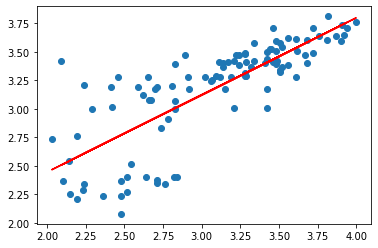

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['high_GPA'],data['univ_GPA'])
plt.plot(data['high_GPA'],w0+w1*data['high_GPA'],color="r")

**Observation** : This seems to be heteroscedastic in nature

In [ ]:
# BIAS

w0_list = []
w1_list = []

for j in range(10):
  data_1 = data.sample(frac=0.4)

  indices = []

  for i in data_1.index:
    indices.append(i)

  x = [[1,data_1['high_GPA'][indices[0]]]]

  for i in range(1,len(indices)):
    x.append([1,data_1['high_GPA'][indices[i]]])

  x = np.array(x)
  x = np.asmatrix(x)

  xT = np.matrix.transpose(x)

  y = np.matrix(np.array(data_1['univ_GPA']))
  y = np.matrix.transpose(y)

  a = xT @ y
  b = np.linalg.inv((xT@x))
  w = b @ a
  w0 = w.item(0)
  w1 = w.item(1)

  w0_list.append(w0)
  w1_list.append(w1)

print(w0_list)
print(w1_list)

[1.2438622485580237, 1.73943891471633, 1.4109631995939036, 1.3005355807930383, 1.2215100097910425, 0.8718974905217626, 1.4596891501393632, 1.12906974910797, 1.4068256574367932, 0.9739039430086923]
[0.6255903244162271, 0.4908334547445381, 0.5836388580178725, 0.6162423170775919, 0.6429535654021649, 0.7417619060086158, 0.567418915950494, 0.6692118526534143, 0.5799423735176787, 0.7136058119694513]


In [ ]:
estimated_w0 = 0
estimated_w1 = 0

for i in range(len(w0_list)):
  estimated_w0 += w0_list[i]
  estimated_w1 += w1_list[i]

estimated_w0 = estimated_w0 / len(w0_list)
estimated_w1 = estimated_w1 / len(w1_list)

bias_w0 = estimated_w0 - beta_w0
bias_w1 = estimated_w1 - beta_w1

print("Bias w0,w1 : ", bias_w0, "\t", bias_w1)

Bias w0,w1 :  0.15568390765000095 	 -0.04741200128401091


# **MODEL - 2 (comp_GPA)**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['comp_GPA'], data['univ_GPA'], test_size=0.3, random_state = 42)

In [ ]:
indices = []

for i in x_train.index:
  indices.append(i)

  x = [[1,x_train[indices[0]]]]

  for i in range(1,len(indices)):
    x.append([1,x_train[indices[i]]])

x = np.array(x)
x = np.asmatrix(x)
x.shape

(73, 2)

In [ ]:
xT = np.matrix.transpose(x)
xT.shape

(2, 73)

In [ ]:
y = np.matrix(np.array(y_train))
y = np.matrix.transpose(y)
y.shape

(73, 1)

In [ ]:
a = xT @ y
b = np.linalg.inv((xT@x))
w = b @ a
w0 = w.item(0)
w1 = w.item(1)

#For bias calculation
beta_w0 = w0  
beta_w1 = w1

print("W0: ",w0)
print("W1: ",w1)

W0:  0.7016362198491638
W1:  0.7934844717280045


In [ ]:
y_predicted = []

for i in x_test.index:
  y_predicted.append(lin_model(w1,w0,x_test[i]))

y_predicted

[3.4629621814626197,
 3.1535032374886978,
 3.859704417326622,
 2.6774125544518954,
 3.1376335480541377,
 3.1376335480541377,
 3.3042652871170186,
 3.034480566729497,
 3.56611516278726,
 3.685137833546461,
 2.3996929893470935,
 3.6454636099600606,
 2.9075230512530164,
 2.4076278340643733,
 3.193177461075098,
 3.312200131834299,
 3.0979593244677375,
 3.748616591284701,
 3.2487213740960583,
 2.693282243886455,
 2.3996929893470935,
 2.3441490763261332,
 3.2169819952269383,
 3.1535032374886978,
 3.328069821268859,
 3.399483423724379,
 3.4947015603317397,
 3.2169819952269383,
 3.3042652871170186,
 3.4074182684416594,
 3.3360046659861387,
 2.669477709734615]

In [ ]:
y_target = list(y_test)

In [ ]:
mean = y_test.mean()
mean

3.1190625000000005

In [ ]:
print("SST: ",SST(y_target,mean))
print("SSE: ",SSE(y_target,y_predicted))
print("SSR: ",SSR(y_target,y_predicted,mean))
print("MSE: ",MSE(y_target,y_predicted))
print("RMSE: ",RMSE(y_target,y_predicted))
print("R2: ",R2(y_target,y_predicted,mean))
print("Correlation: ",np.corrcoef(data['comp_GPA'],data['univ_GPA']))

SST:  6.924471875
SSE:  0.5483461022560092
SSR:  6.376125772743991
MSE:  0.017135815695500288
RMSE:  0.13090384140849454
R2:  0.9208104080492046
Correlation:  [[1.         0.93904588]
 [0.93904588 1.        ]]


**Observation** : Since R2 is 0.92, which is close to ideal value 1, it is the best model. 

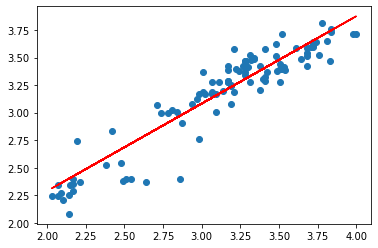

In [ ]:
plt.scatter(data['comp_GPA'],data['univ_GPA'])
plt.plot(data['comp_GPA'],w0+w1*data['comp_GPA'],color="r")

**Observation** : This seems to be homoscedastic in nature

In [ ]:
# BIAS

w0_list = []
w1_list = []

for j in range(10):
  data_1 = data.sample(frac=0.4)

  indices = []

  for i in data_1.index:
    indices.append(i)

  x = [[1,data_1['comp_GPA'][indices[0]]]]

  for i in range(1,len(indices)):
    x.append([1,data_1['comp_GPA'][indices[i]]])

  x = np.array(x)
  x = np.asmatrix(x)

  xT = np.matrix.transpose(x)

  y = np.matrix(np.array(data_1['univ_GPA']))
  y = np.matrix.transpose(y)

  a = xT @ y
  b = np.linalg.inv((xT@x))
  w = b @ a
  w0 = w.item(0)
  w1 = w.item(1)

  w0_list.append(w0)
  w1_list.append(w1)

print(w0_list)
print(w1_list)

[0.5601293909231215, 0.4720039088179226, 0.8039168591618092, 0.5846026814871026, 0.5440370937989495, 0.5812749379351209, 0.3645300997900905, 0.8125105564239672, 0.6546307800736124, 0.6760362696054157]
[0.8305314694896735, 0.8614138384809379, 0.7599991967538957, 0.8224253959678093, 0.8446130418941191, 0.8291451210952784, 0.893626437697453, 0.7632208080949405, 0.8105543934514602, 0.7981648581504998]


In [ ]:
estimated_w0 = 0
estimated_w1 = 0

for i in range(len(w0_list)):
  estimated_w0 += w0_list[i]
  estimated_w1 += w1_list[i]

estimated_w0 = estimated_w0 / len(w0_list)
estimated_w1 = estimated_w1 / len(w1_list)

bias_w0 = estimated_w0 - beta_w0
bias_w1 = estimated_w1 - beta_w1

print("Bias w0,w1 : ", bias_w0, "\t", bias_w1)

Bias w0,w1 :  -0.0962689620474525 	 0.027884984379602074


# **MODEL - 3 (math_SAT)**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['math_SAT'], data['univ_GPA'], test_size=0.3, random_state = 42)

In [ ]:
indices = []

for i in x_train.index:
  indices.append(i)

  x = [[1,x_train[indices[0]]]]

  for i in range(1,len(indices)):
    x.append([1,x_train[indices[i]]])

x = np.array(x)
x = np.asmatrix(x)
x.shape

(73, 2)

In [ ]:
xT = np.matrix.transpose(x)
xT.shape

(2, 73)

In [ ]:
y = np.matrix(np.array(y_train))
y = np.matrix.transpose(y)
y.shape

(73, 1)

In [ ]:
a = xT @ y
b = np.linalg.inv((xT@x))
w = b @ a
w0 = w.item(0)
w1 = w.item(1)

#For bias calculation
beta_w0 = w0  
beta_w1 = w1

print("W0: ",w0)
print("W1: ",w1)

W0:  -0.17168343377969747
W1:  0.005361263179301024


In [ ]:
y_predicted = []

for i in x_test.index:
  y_predicted.append(lin_model(w1,w0,x_test[i]))

y_predicted

[3.5865620549103205,
 3.404279106814086,
 3.5329494231173104,
 2.79845636755307,
 2.9056816311390907,
 3.1469384742076367,
 2.5947283667396315,
 3.0826033160560247,
 3.4954205808622034,
 3.2756087905108613,
 2.8520689993460806,
 3.5329494231173104,
 3.0933258424146266,
 2.8520689993460806,
 2.79845636755307,
 3.002184368366509,
 2.8895978416011876,
 3.5222268967587085,
 3.0665195265181215,
 2.937849210214897,
 2.8735140520632845,
 2.9056816311390907,
 3.0826033160560247,
 2.8520689993460806,
 3.0665195265181215,
 3.2648862641522594,
 3.4900593176829022,
 3.0665195265181215,
 3.0826033160560247,
 3.136215947849035,
 3.3184988959452695,
 2.8735140520632845]

In [ ]:
y_target = list(y_test)

In [ ]:
mean = y_test.mean()
mean

3.1190625000000005

In [ ]:
print("SST: ",SST(y_target,mean))
print("SSE: ",SSE(y_target,y_predicted))
print("SSR: ",SSR(y_target,y_predicted,mean))
print("MSE: ",MSE(y_target,y_predicted))
print("RMSE: ",RMSE(y_target,y_predicted))
print("R2: ",R2(y_target,y_predicted,mean))
print("Correlation: ",np.corrcoef(data['math_SAT'],data['univ_GPA']))

SST:  6.924471875
SSE:  4.203252639674077
SSR:  2.721219235325923
MSE:  0.13135164498981491
RMSE:  0.36242467491854763
R2:  0.39298581674518285
Correlation:  [[1.         0.66278369]
 [0.66278369 1.        ]]


**Observation** : Since R2 is 0.39, it is not a good model

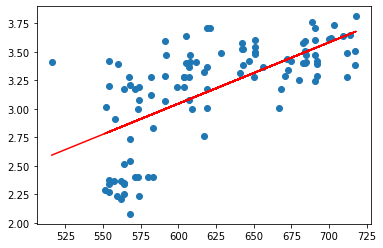

In [ ]:
plt.scatter(data['math_SAT'],data['univ_GPA'])
plt.plot(data['math_SAT'],w0+w1*data['math_SAT'],color="r")

**Observation** : This seems to be heteroscedastic in nature

In [ ]:
# BIAS

w0_list = []
w1_list = []

for j in range(10):
  data_1 = data.sample(frac=0.4)

  indices = []

  for i in data_1.index:
    indices.append(i)

  x = [[1,data_1['math_SAT'][indices[0]]]]

  for i in range(1,len(indices)):
    x.append([1,data_1['math_SAT'][indices[i]]])

  x = np.array(x)
  x = np.asmatrix(x)

  xT = np.matrix.transpose(x)

  y = np.matrix(np.array(data_1['univ_GPA']))
  y = np.matrix.transpose(y)

  a = xT @ y
  b = np.linalg.inv((xT@x))
  w = b @ a
  w0 = w.item(0)
  w1 = w.item(1)

  w0_list.append(w0)
  w1_list.append(w1)

print(w0_list)
print(w1_list)

[0.2850149493943771, 0.5815275543478529, 0.9984810015521122, 1.0443893021351356, -0.14356539788833067, 0.31702796823620044, 0.5927536563169398, 0.57452566390871, 0.6619686230679799, 0.37446607387986947]
[0.004793253450290006, 0.00428284439734007, 0.0036861792962564355, 0.0036171759043494003, 0.005527537327905597, 0.004809781048541463, 0.004329388060370243, 0.004324128564134582, 0.004189093842154752, 0.004673587828960696]


In [ ]:
estimated_w0 = 0
estimated_w1 = 0

for i in range(len(w0_list)):
  estimated_w0 += w0_list[i]
  estimated_w1 += w1_list[i]

estimated_w0 = estimated_w0 / len(w0_list)
estimated_w1 = estimated_w1 / len(w1_list)

bias_w0 = estimated_w0 - beta_w0
bias_w1 = estimated_w1 - beta_w1

print("Bias w0,w1 : ", bias_w0, "\t", bias_w1)

Bias w0,w1 :  0.7770506915814088 	 0.8160081929283055


# **MODEL - 4 (verb_SAT)**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['verb_SAT'], data['univ_GPA'], test_size=0.3, random_state = 42)

In [ ]:
indices = []

for i in x_train.index:
  indices.append(i)

  x = [[1,x_train[indices[0]]]]

  for i in range(1,len(indices)):
    x.append([1,x_train[indices[i]]])

x = np.array(x)
x = np.asmatrix(x)
x.shape

(73, 2)

In [ ]:
xT = np.matrix.transpose(x)
xT.shape

(2, 73)

In [ ]:
y = np.matrix(np.array(y_train))
y = np.matrix.transpose(y)
y.shape

(73, 1)

In [ ]:
a = xT @ y
b = np.linalg.inv((xT@x))
w = b @ a
w0 = w.item(0)
w1 = w.item(1)

#For bias calculation
beta_w0 = w0  
beta_w1 = w1


print("W0: ",w0)
print("W1: ",w1)

W0:  0.4747167693021786
W1:  0.0045129168182652035


In [ ]:
y_predicted = []

for i in x_test.index:
  y_predicted.append(lin_model(w1,w0,x_test[i]))

y_predicted

[3.696939377543534,
 3.1057472743507923,
 3.385548117083235,
 2.9026660175288583,
 2.9477951857115103,
 3.2862639470814003,
 2.8575368493462063,
 2.8575368493462063,
 3.4035997843562957,
 3.1328247752603837,
 2.7356880952530456,
 3.5615518729955777,
 2.9793856034393666,
 2.9523081025297753,
 2.7717914297991673,
 2.9026660175288583,
 2.7447139288895763,
 3.511909787994661,
 3.1012343575325274,
 2.9026660175288583,
 2.916204767983654,
 3.1914926938978314,
 3.2682122798083397,
 3.141850608896914,
 3.2591864461718094,
 3.2185701948074223,
 3.3720093666284394,
 3.1057472743507923,
 3.2907768638996657,
 3.141850608896914,
 3.362983532991909,
 3.1463635257151794]

In [ ]:
y_target = list(y_test)

In [ ]:
mean = y_test.mean()
mean

3.1190625000000005

In [ ]:
print("SST: ",SST(y_target,mean))
print("SSE: ",SSE(y_target,y_predicted))
print("SSR: ",SSR(y_target,y_predicted,mean))
print("MSE: ",MSE(y_target,y_predicted))
print("RMSE: ",RMSE(y_target,y_predicted))
print("R2: ",R2(y_target,y_predicted,mean))
print("Correlation: ",np.corrcoef(data['verb_SAT'],data['univ_GPA']))

SST:  6.924471875
SSE:  4.690820084775476
SSR:  2.233651790224524
MSE:  0.14658812764923362
RMSE:  0.3828682902111817
R2:  0.3225735955819048
Correlation:  [[1.         0.65030121]
 [0.65030121 1.        ]]


**Observation** : Since R2 is 0.32, it is not a good model

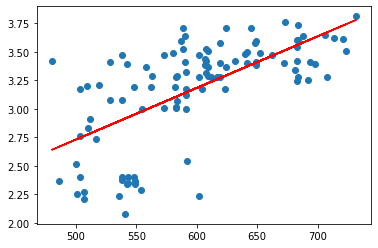

In [ ]:
plt.scatter(data['verb_SAT'],data['univ_GPA'])
plt.plot(data['verb_SAT'],w0+w1*data['verb_SAT'],color="r")

**Observation** : This seems to be homoscedastic in nature

In [ ]:
# BIAS

w0_list = []
w1_list = []

for j in range(10):
  data_1 = data.sample(frac=0.4)

  indices = []

  for i in data_1.index:
    indices.append(i)

  x = [[1,data_1['verb_SAT'][indices[0]]]]

  for i in range(1,len(indices)):
    x.append([1,data_1['verb_SAT'][indices[i]]])

  x = np.array(x)
  x = np.asmatrix(x)

  xT = np.matrix.transpose(x)

  y = np.matrix(np.array(data_1['univ_GPA']))
  y = np.matrix.transpose(y)

  a = xT @ y
  b = np.linalg.inv((xT@x))
  w = b @ a
  w0 = w.item(0)
  w1 = w.item(1)

  w0_list.append(w0)
  w1_list.append(w1)

print(w0_list)
print(w1_list)

[-0.39857839460735944, 0.1491963920801708, 1.3366806967068505, 0.45662442139296044, 0.5879185461988916, 0.0037550371586545016, 0.5516297716535545, 0.5190817442458602, 0.21076847112028102, 0.6670238760524576]
[0.005889919093239113, 0.0050251833032655905, 0.0031553565193423116, 0.004437498501960694, 0.004336794648086729, 0.005275269168887314, 0.004299126526698635, 0.004357634334147317, 0.004928051443646144, 0.004281381222971857]


In [ ]:
estimated_w0 = 0
estimated_w1 = 0

for i in range(len(w0_list)):
  estimated_w0 += w0_list[i]
  estimated_w1 += w1_list[i]

estimated_w0 = estimated_w0 / len(w0_list)
estimated_w1 = estimated_w1 / len(w1_list)

bias_w0 = estimated_w0 - beta_w0
bias_w1 = estimated_w1 - beta_w1

print("Bias w0,w1 : ", bias_w0, "\t", bias_w1)

Bias w0,w1 :  -0.06630671310194647 	 8.570465795936736e-05


# **ANOVA TEST**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOV
model = ols('univ_GPA ~ C(high_GPA) + C(comp_GPA)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(high_GPA),27.225893,74.0,21.417621,0.045589
C(comp_GPA),31.709115,66.0,27.967973,0.035105
Residual,0.034357,2.0,NaN,NaN


In [ ]:
model_1 = ols('univ_GPA ~ C(math_SAT) + C(verb_SAT)', data=data).fit()
sm.stats.anova_lm(model_1, typ=2)

,sum_sq,df,F,PR(>F)
C(math_SAT),9.736729,58.0,7.262061,0.062907
C(verb_SAT),16.170766,66.0,10.598916,0.037096
Residual,0.069350,3.0,NaN,NaN
